In [34]:
print("Nama: Diah Ayu Puspasari")
print("NIM : 0110223052")
print("Rombel : DE02")

Nama: Diah Ayu Puspasari
NIM : 0110223052
Rombel : DE02


In [35]:
# mengimport library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [36]:
# menghubungkan gdrive dengan colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# mengimpoert file dari google drive
path = '/content/drive/MyDrive/praktikum_dm/dataset/'

In [38]:
# membaca file csv menggunakan pandas
mydata = pd.read_csv(path + 'MBA.csv')
mydata

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN
...,...,...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,White,640.0,5.0,Other,NaN
6190,6191,Male,False,3.18,STEM,Black,670.0,4.0,Consulting,NaN
6191,6192,Female,True,3.22,Business,NaN,680.0,5.0,Health Care,Admit
6192,6193,Male,True,3.36,Business,NaN,590.0,5.0,Other,NaN


In [39]:
# melihat datatype dan spesfikasi data
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [40]:
# mencari hasil dari statistika deskriptif kolom float
mydata.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


Membersihkan Data

In [41]:
# mengecek missing values data
mydata.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


In [42]:
# menghapus data (kolom) tertentu yang tidak diperlukan karena keseluruhan data memiliki daa kosong

columns_to_drop = ['race', 'admission']

mydata.drop(columns=columns_to_drop, inplace=True)
mydata

,application_id,gender,international,gpa,major,gmat,work_exp,work_industry
0,1,Female,False,3.30,Business,620.0,3.0,Financial Services
1,2,Male,False,3.28,Humanities,680.0,5.0,Investment Management
2,3,Female,True,3.30,Business,710.0,5.0,Technology
3,4,Male,False,3.47,STEM,690.0,6.0,Technology
4,5,Male,False,3.35,STEM,590.0,5.0,Consulting
...,...,...,...,...,...,...,...,...
6189,6190,Male,False,3.49,Business,640.0,5.0,Other
6190,6191,Male,False,3.18,STEM,670.0,4.0,Consulting
6191,6192,Female,True,3.22,Business,680.0,5.0,Health Care
6192,6193,Male,True,3.36,Business,590.0,5.0,Other


In [43]:
# menjadikan application_id sebagai index agar memudahkan mengambil sebuah data
mydata.set_index('application_id', inplace=True)
mydata

,gender,international,gpa,major,gmat,work_exp,work_industry
application_id,,,,,,,
1,Female,False,3.30,Business,620.0,3.0,Financial Services
2,Male,False,3.28,Humanities,680.0,5.0,Investment Management
3,Female,True,3.30,Business,710.0,5.0,Technology
4,Male,False,3.47,STEM,690.0,6.0,Technology
5,Male,False,3.35,STEM,590.0,5.0,Consulting
...,...,...,...,...,...,...,...
6190,Male,False,3.49,Business,640.0,5.0,Other
6191,Male,False,3.18,STEM,670.0,4.0,Consulting
6192,Female,True,3.22,Business,680.0,5.0,Health Care


In [44]:
# merubah nama kolom
mydata.rename(columns={
    'gender': 'Jenis_Kelamin',
    'international': 'Siswa_Internasional',
    'gpa': 'Nilai_IPK',
    'major': 'Jurusan_Sarjana',
    'race': 'Latar_Belakang_Ras',
    'gmat': 'Skor_GMAT',
    'work_exp': 'Pengalaman_Kerja_Tahun',
    'work_industry': 'Industri_Pengalaman_Kerja',
    'admission': 'Status_Penerimaan'
}, inplace=True)

# Menampilkan dataframe setelah rename
mydata

,Jenis_Kelamin,Siswa_Internasional,Nilai_IPK,Jurusan_Sarjana,Skor_GMAT,Pengalaman_Kerja_Tahun,Industri_Pengalaman_Kerja
application_id,,,,,,,
1,Female,False,3.30,Business,620.0,3.0,Financial Services
2,Male,False,3.28,Humanities,680.0,5.0,Investment Management
3,Female,True,3.30,Business,710.0,5.0,Technology
4,Male,False,3.47,STEM,690.0,6.0,Technology
5,Male,False,3.35,STEM,590.0,5.0,Consulting
...,...,...,...,...,...,...,...
6190,Male,False,3.49,Business,640.0,5.0,Other
6191,Male,False,3.18,STEM,670.0,4.0,Consulting
6192,Female,True,3.22,Business,680.0,5.0,Health Care


Visualisasi Data


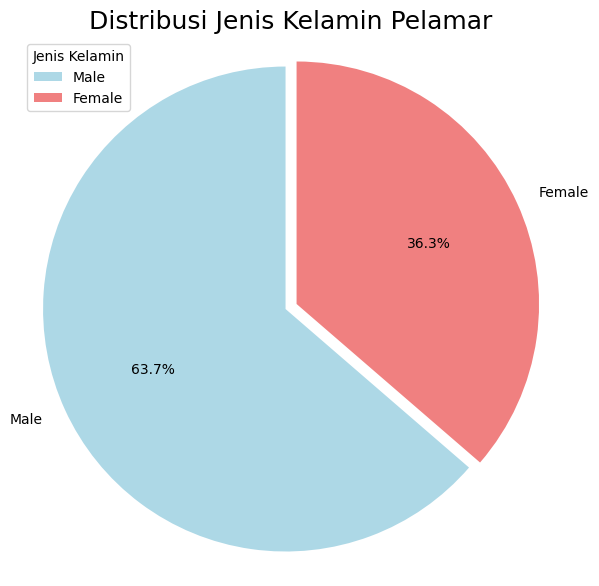

In [45]:
# Import libraries yang diperlukan
import matplotlib.pyplot as plt

# Menghitung jumlah pelamar pria dan wanita
gender_counts = mydata['Jenis_Kelamin'].value_counts()

# Membuat pie chart dengan perbaikan tampilan
colors = ['lightblue', 'lightcoral']  # Warna untuk pria dan wanita
explode = [0.05, 0]  # Memisahkan sedikit segmen pertama (Pria)

plt.figure(figsize=(7, 7))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.legend(title='Jenis Kelamin', loc='upper left') # informasi bar warna biru dan pink
plt.title('Distribusi Jenis Kelamin Pelamar', fontsize=18)
plt.axis('equal')  # Memastikan pie chart berbentuk bulat
plt.show()



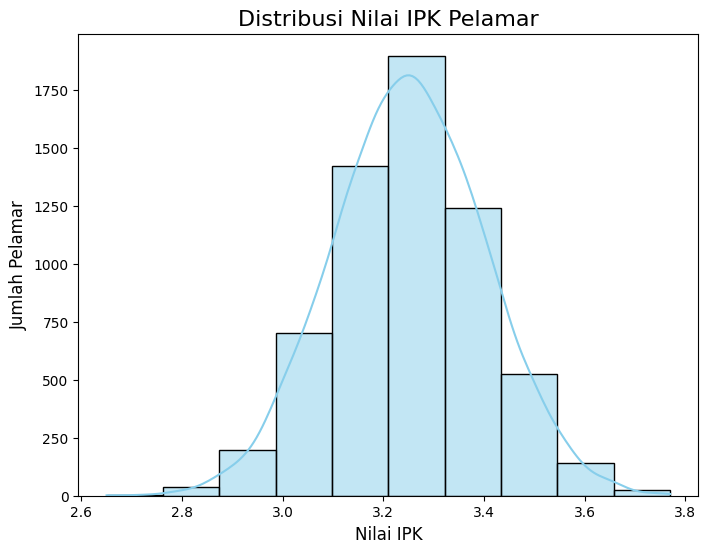

In [46]:
# mengimport library
import seaborn as sns
import matplotlib.pyplot

plt.figure(figsize=(8, 6))
sns.histplot(mydata['Nilai_IPK'], bins=10, kde=True, color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Distribusi Nilai IPK Pelamar', fontsize=16)
plt.xlabel('Nilai IPK', fontsize=12)
plt.ylabel('Jumlah Pelamar', fontsize=12)

# Menampilkan plot
plt.show()

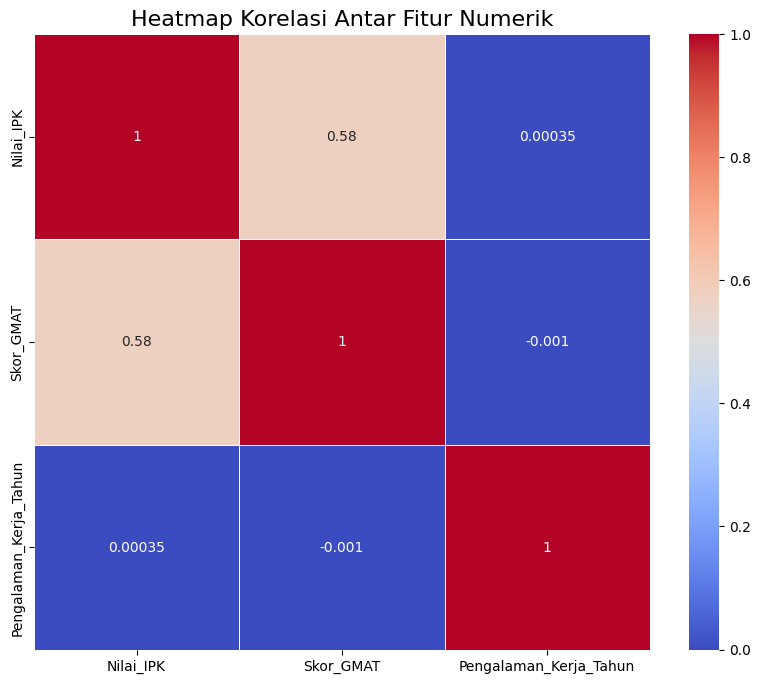

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Membuat heatmap untuk korelasi antar fitur numerik
plt.figure(figsize=(10, 8))

# Menghitung korelasi antar fitur numerik
correlation_matrix = mydata[['Nilai_IPK', 'Skor_GMAT', 'Pengalaman_Kerja_Tahun']].corr()

# Membuat heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, square=True)

# Menambahkan judul
plt.title('Heatmap Korelasi Antar Fitur Numerik', fontsize=16)

# Menampilkan heatmap
plt.show()

Normalisasi Data

In [48]:
# Memilih fitur numerik yang akan distandardisasi (misalnya 'Nilai_IPK', 'Skor_GMAT', 'Pengalaman_Kerja_Tahun')
numerical_features = ['Nilai_IPK', 'Skor_GMAT', 'Pengalaman_Kerja_Tahun']

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Fit dan transformasi data menggunakan Min-Max Scaling
scaled_data = scaler.fit_transform(mydata[numerical_features])

# Menyimpan data yang telah diskalakan dalam DataFrame baru
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

# Menampilkan hasil scaling
print("Data Asli:")
print(mydata[numerical_features].head())

print("\nData Setelah Min-Max Scaling:")
print(scaled_df.head())

Data Asli:
                Nilai_IPK  Skor_GMAT  Pengalaman_Kerja_Tahun
application_id                                              
1                    3.30      620.0                     3.0
2                    3.28      680.0                     5.0
3                    3.30      710.0                     5.0
4                    3.47      690.0                     6.0
5                    3.35      590.0                     5.0

Data Setelah Min-Max Scaling:
   Nilai_IPK  Skor_GMAT  Pengalaman_Kerja_Tahun
0   0.580357   0.238095                   0.250
1   0.562500   0.523810                   0.500
2   0.580357   0.666667                   0.500
3   0.732143   0.571429                   0.625
4   0.625000   0.095238                   0.500


In [50]:
# Memilih fitur numerik yang akan distandardisasi (misalnya 'Nilai_IPK', 'Skor_GMAT', 'Pengalaman_Kerja_Tahun')
numerical_features = ['Nilai_IPK', 'Skor_GMAT', 'Pengalaman_Kerja_Tahun']

# Mengimport StandardScaler dari scikit-learn
from sklearn.preprocessing import StandardScaler # Importing the StandardScaler class from sklearn.preprocessing

# Inisialisasi objek StandardScaler
scaler = StandardScaler()

# Fit dan transformasi data menggunakan Z-Score Transformation
z_score_data = scaler.fit_transform(mydata[numerical_features])

# Menyimpan data yang telah distandardisasi dalam DataFrame baru
z_score_df = pd.DataFrame(z_score_data, columns=numerical_features)

# Menampilkan hasil Z-Score Transformation
print("Data Asli:")
print(mydata[numerical_features].head())

print("\nData Setelah Z-Score Transformation:")
print(z_score_df.head())

Data Asli:
                Nilai_IPK  Skor_GMAT  Pengalaman_Kerja_Tahun
application_id                                              
1                    3.30      620.0                     3.0
2                    3.28      680.0                     5.0
3                    3.30      710.0                     5.0
4                    3.47      690.0                     6.0
5                    3.35      590.0                     5.0

Data Setelah Z-Score Transformation:
   Nilai_IPK  Skor_GMAT  Pengalaman_Kerja_Tahun
0   0.325261  -0.630806               -1.953750
1   0.193273   0.586457               -0.016421
2   0.325261   1.195089               -0.016421
3   1.447159   0.789334                0.952244
4   0.655231  -1.239437               -0.016421


In [51]:
# Memilih fitur numerik yang akan ditransformasi (misalnya 'Nilai_IPK', 'Skor_GMAT', 'Pengalaman_Kerja_Tahun')
numerical_features = ['Nilai_IPK', 'Skor_GMAT', 'Pengalaman_Kerja_Tahun']

# Menentukan faktor penggeseran berdasarkan nilai maksimum dari setiap kolom
scaling_factor = 10 ** np.ceil(np.log10(mydata[numerical_features].abs().max()))

# Melakukan Decimal Scaling
scaled_data = mydata[numerical_features] / scaling_factor

# Menyimpan data yang telah ditransformasi dalam DataFrame baru
scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)

# Menampilkan hasil Decimal Scaling
print("Data Asli:")
print(mydata[numerical_features].head())

print("\nData Setelah Decimal Scaling:")
print(scaled_df.head())

Data Asli:
                Nilai_IPK  Skor_GMAT  Pengalaman_Kerja_Tahun
application_id                                              
1                    3.30      620.0                     3.0
2                    3.28      680.0                     5.0
3                    3.30      710.0                     5.0
4                    3.47      690.0                     6.0
5                    3.35      590.0                     5.0

Data Setelah Decimal Scaling:
                Nilai_IPK  Skor_GMAT  Pengalaman_Kerja_Tahun
application_id                                              
1                   0.330       0.62                     0.3
2                   0.328       0.68                     0.5
3                   0.330       0.71                     0.5
4                   0.347       0.69                     0.6
5                   0.335       0.59                     0.5
